In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/data/QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])

In [20]:
first_5_rows = df.head()
print("First 5 rows:")
print(first_5_rows)

First 5 rows:
                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


In [21]:
# Display the last 5 rows
last_5_rows = df.tail()
print("\nLast 5 rows:")
print(last_5_rows)


Last 5 rows:
                     DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


In [22]:
dimensions = df.shape
print("Dimensions of the DataFrame:", dimensions)

num_rows = dimensions[0]
num_columns = dimensions[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Dimensions of the DataFrame: (1991, 3)
Number of rows: 1991
Number of columns: 3


In [23]:

# Use df.info() to get a summary
print('df.info() = ')
df.info()  # This prints a summary directly
print()

# Print column names
print(f'df.columns = {df.columns}\n')

# Get the shape of the DataFrame
row, col = df.shape
print(f'Number of rows (len(df)) = {len(df)}')
print(f'Number of rows (df.shape[0]) = {df.shape[0]}')
print(f'Number of rows (row) = {row}\n')
print(f'Number of columns (len(df.columns)) =  {len(df.columns)}')
print(f'Number of columns (df.shape[1]) =  {df.shape[1]}')
print(f'Number of columns (col) = {col}\n')

# Calculate the total number of elements
print(f'df.size = {df.size} = {row} * {col}')


df.info() = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1991 non-null   object
 1   TAG     1991 non-null   object
 2   POSTS   1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB

df.columns = Index(['DATE', 'TAG', 'POSTS'], dtype='object')

Number of rows (len(df)) = 1991
Number of rows (df.shape[0]) = 1991
Number of rows (row) = 1991

Number of columns (len(df.columns)) =  3
Number of columns (df.shape[1]) =  3
Number of columns (col) = 3

df.size = 5973 = 1991 * 3


In [24]:
column_counts = df.count()
print(column_counts)


DATE     1991
TAG      1991
POSTS    1991
dtype: int64


In [25]:
# Group by 'TAG' and sum the 'POSTS'
total_posts_per_language = df.groupby('TAG')['POSTS'].sum()

# Find the language with the highest total number of posts
most_popular_language = total_posts_per_language.idxmax()
highest_total_posts = total_posts_per_language.max()

print("Total number of posts per language:")
print(total_posts_per_language)
print(f"\nThe programming language with the highest total number of posts is {most_popular_language} with {highest_total_posts} posts.")


Total number of posts per language:
TAG
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
Name: POSTS, dtype: int64

The programming language with the highest total number of posts is javascript with 2056510 posts.


In [26]:
# Group by 'TAG' and count unique 'DATE' entries
months_per_language = df.groupby('TAG')['DATE'].nunique()

# Find the language with the fewest months with an entry
language_with_fewest_months = months_per_language.idxmin()
fewest_months = months_per_language.min()

print("Number of months of data per language:")
print(months_per_language)
print(f"\nThe programming language with the fewest months with an entry is {language_with_fewest_months} with {fewest_months} months.")


Number of months of data per language:
TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
Name: DATE, dtype: int64

The programming language with the fewest months with an entry is go with 129 months.


In [27]:
# Convert 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Format 'DATE' column to YYYY-MM-DD
df['DATE'] = df['DATE'].dt.strftime('%Y-%m-%d')

# Display the first few rows to verify
print(df.head())

         DATE         TAG  POSTS
0  2008-07-01          c#      3
1  2008-08-01    assembly      8
2  2008-08-01  javascript    162
3  2008-08-01           c     85
4  2008-08-01      python    124


In [28]:
# Pivot the DataFrame
reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS', fill_value=0)

# Examine the dimensions of the reshaped DataFrame
num_rows, num_columns = reshaped_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Examine the head and tail of the reshaped DataFrame
print("\nHead of reshaped DataFrame:")
print(reshaped_df.head())

print("\nTail of reshaped DataFrame:")
print(reshaped_df.tail())

# Print the column names
print("\nColumn names:")
print(reshaped_df.columns)

# Count the number of entries per column
print("\nNumber of entries per column:")
print(reshaped_df.count())

Number of rows: 145
Number of columns: 14

Head of reshaped DataFrame:
TAG         assembly      c      c#    c++  delphi   go    java  javascript  \
DATE                                                                          
2008-07-01       0.0    0.0     3.0    0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   85.0   511.0  164.0    14.0  0.0   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0  0.0  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0  0.0  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0  0.0   958.0       579.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    0.0    0.0     0.0  0.0    0.0    0.0  
2008-08-01   28.0  161.0   124.0  0.0   73.0    0.0  
2008-09-01  131.0  482.0   542.0  6.0  290.0    0.0  
2008-10-01  127.0  617.0   510.0  0.0  249.0    0.0  
2008-11-01   97.0  504.0   452.0  1.0  160.0    0.0

In [29]:
reshaped_df.shape

(145, 14)

In [30]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [31]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [32]:
# Check for NaN
reshaped_df.isna().values.any()

False

In [33]:
# Verify if there are any NaN values left
nan_counts = reshaped_df.isna().sum()

print("Number of NaN values per column:")
print(nan_counts)

# To confirm that no NaN values remain
if nan_counts.sum() == 0:
    print("\nAll NaN values have been successfully replaced with 0.")
else:
    print("\nThere are still NaN values present in the DataFrame.")

Number of NaN values per column:
TAG
assembly      0
c             0
c#            0
c++           0
delphi        0
go            0
java          0
javascript    0
perl          0
php           0
python        0
r             0
ruby          0
swift         0
dtype: int64

All NaN values have been successfully replaced with 0.


In [34]:
reshaped_df.count()


,0
TAG,
assembly,145
c,145
c#,145
c++,145
delphi,145
go,145
java,145
javascript,145
perl,145


In [35]:
# Check the original DataFrame before pivoting
print("Original DataFrame counts:")
print(df['TAG'].value_counts())

# Check the reshaped DataFrame counts
reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS', fill_value=0)
reshaped_df.fillna(0, inplace=True)
entries_per_language = reshaped_df.count()

print("\nEntries per programming language after pivoting and filling NaNs:")
print(entries_per_language)

Original DataFrame counts:
TAG
c#            145
assembly      144
javascript    144
c             144
python        144
perl          144
c++           144
java          144
delphi        144
ruby          144
php           144
r             142
swift         135
go            129
Name: count, dtype: int64

Entries per programming language after pivoting and filling NaNs:
TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64


In [37]:
import pandas as pd

# Load and prepare the original DataFrame
df = pd.read_csv("/content/sample_data/data/QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])
df['DATE'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%m-%d')

# Check the counts before pivoting
print("Original DataFrame counts:")
print(df['TAG'].value_counts())

# Pivot the DataFrame
reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS', fill_value=0)

# Check the counts after pivoting and filling NaNs
reshaped_df.fillna(0, inplace=True)
entries_per_language = reshaped_df.notna().sum()

print("\nEntries per programming language after pivoting and filling NaNs:")
print(entries_per_language)


Original DataFrame counts:
TAG
c#            145
assembly      144
javascript    144
c             144
python        144
perl          144
c++           144
java          144
delphi        144
ruby          144
php           144
r             142
swift         135
go            129
Name: count, dtype: int64

Entries per programming language after pivoting and filling NaNs:
TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64


In [38]:
import pandas as pd

# Load and prepare the original DataFrame
df = pd.read_csv("/content/sample_data/data/QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])
df['DATE'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%m-%d')

# Check for duplicate entries
print("Checking for duplicate entries:")
print(df[df.duplicated(subset=['DATE', 'TAG'])])

# Pivot the DataFrame
reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS', aggfunc='sum', fill_value=0)

# Check the counts after pivoting and filling NaNs
reshaped_df.fillna(0, inplace=True)
entries_per_language = reshaped_df.notna().sum()

print("\nEntries per programming language after pivoting and filling NaNs:")
print(entries_per_language)


Checking for duplicate entries:
Empty DataFrame
Columns: [DATE, TAG, POSTS]
Index: []

Entries per programming language after pivoting and filling NaNs:
TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64


In [39]:
import pandas as pd

# Load and prepare the original DataFrame
df = pd.read_csv("/content/sample_data/data/QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])
df['DATE'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%m-%d')

# Verify the unique counts of each TAG and DATE
print("Unique counts of TAG and DATE:")
print(df.groupby(['TAG']).size())

# Pivot the DataFrame with aggregation
reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS', aggfunc='sum', fill_value=0)

# Check the counts after pivoting and filling NaNs
reshaped_df.fillna(0, inplace=True)
entries_per_language = reshaped_df.notna().sum()

print("\nEntries per programming language after pivoting and filling NaNs:")
print(entries_per_language)


Unique counts of TAG and DATE:
TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

Entries per programming language after pivoting and filling NaNs:
TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64


In [40]:
import pandas as pd

# Load and prepare the original DataFrame
df = pd.read_csv("/content/sample_data/data/QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])
df['DATE'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%m-%d')

# Pivot the DataFrame with aggregation
reshaped_df = df.pivot_table(index='DATE', columns='TAG', values='POSTS', aggfunc='sum', fill_value=0)

# Check the DataFrame structure
print("\nReshaped DataFrame head:")
print(reshaped_df.head())

print("\nReshaped DataFrame tail:")
print(reshaped_df.tail())

print("\nReshaped DataFrame shape:")
print(reshaped_df.shape)

print("\nEntries per programming language after pivoting and filling NaNs:")
entries_per_language = reshaped_df.notna().sum()
print(entries_per_language)



Reshaped DataFrame head:
TAG         assembly    c    c#  c++  delphi  go  java  javascript  perl  php  \
DATE                                                                            
2008-07-01         0    0     3    0       0   0     0           0     0    0   
2008-08-01         8   85   511  164      14   0   222         162    28  161   
2008-09-01        28  321  1649  755     105   0  1137         640   131  482   
2008-10-01        15  303  1989  811     112   0  1153         725   127  617   
2008-11-01        17  259  1730  735     141   0   958         579    97  504   

TAG         python  r  ruby  swift  
DATE                                
2008-07-01       0  0     0      0  
2008-08-01     124  0    73      0  
2008-09-01     542  6   290      0  
2008-10-01     510  0   249      0  
2008-11-01     452  1   160      0  

Reshaped DataFrame tail:
TAG         assembly     c     c#   c++  delphi   go   java  javascript  perl  \
DATE                                    

In [41]:
# Count non-zero entries per programming language
non_zero_entries_per_language = reshaped_df.astype(bool).sum()
print(non_zero_entries_per_language)


TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64


In [42]:
# Check for any remaining NaN values
has_nan = reshaped_df.isna().values.any()
print(has_nan)  # This will print True if there are NaNs, or False if all NaNs are replaced
# True: Indicates that there are still NaN values in the DataFrame.
# False: Indicates that there are no NaN values left in the DataFrame, meaning the fillna(0) operation was successful.

False


In [43]:
pip install matplotlib

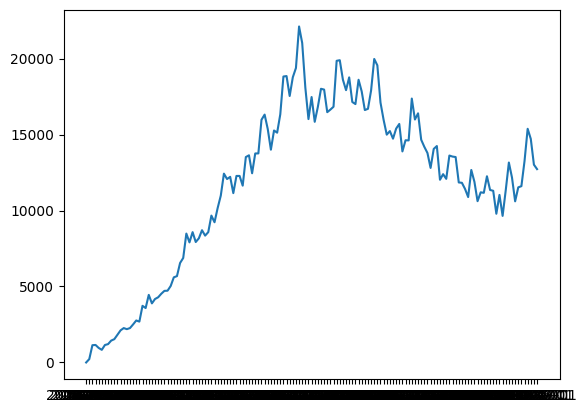

In [48]:
# plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df['java'])

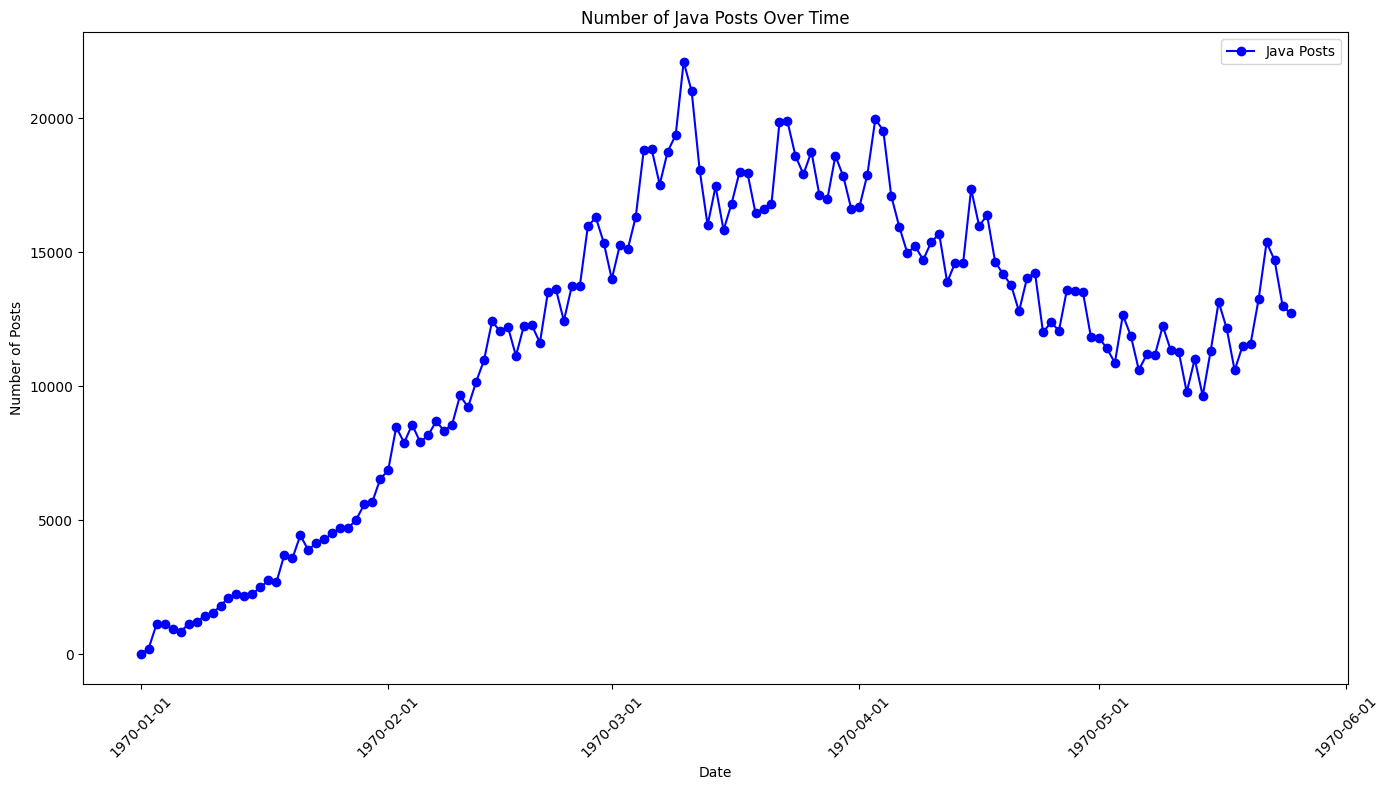

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 8))  # Increase figure size for more space
plt.plot(reshaped_df.index, reshaped_df['java'], marker='o', linestyle='-', color='b', label='Java Posts')

# Add titles and labels
plt.title('Number of Java Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')

# Set date locator and formatter for better x-axis management
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


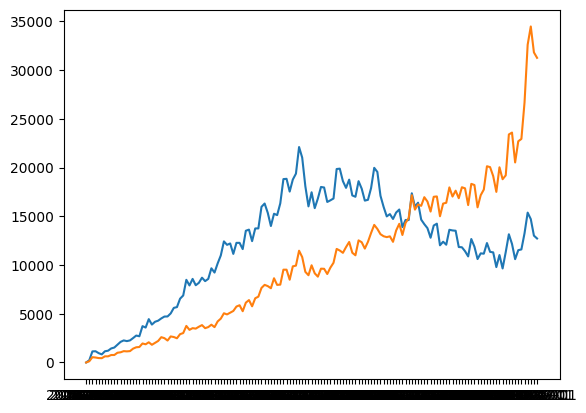

In [54]:
# plt.plot(reshaped_df['java'])
# plt.plot(reshaped_df['python'])
plt.plot(reshaped_df[['java', 'python']])

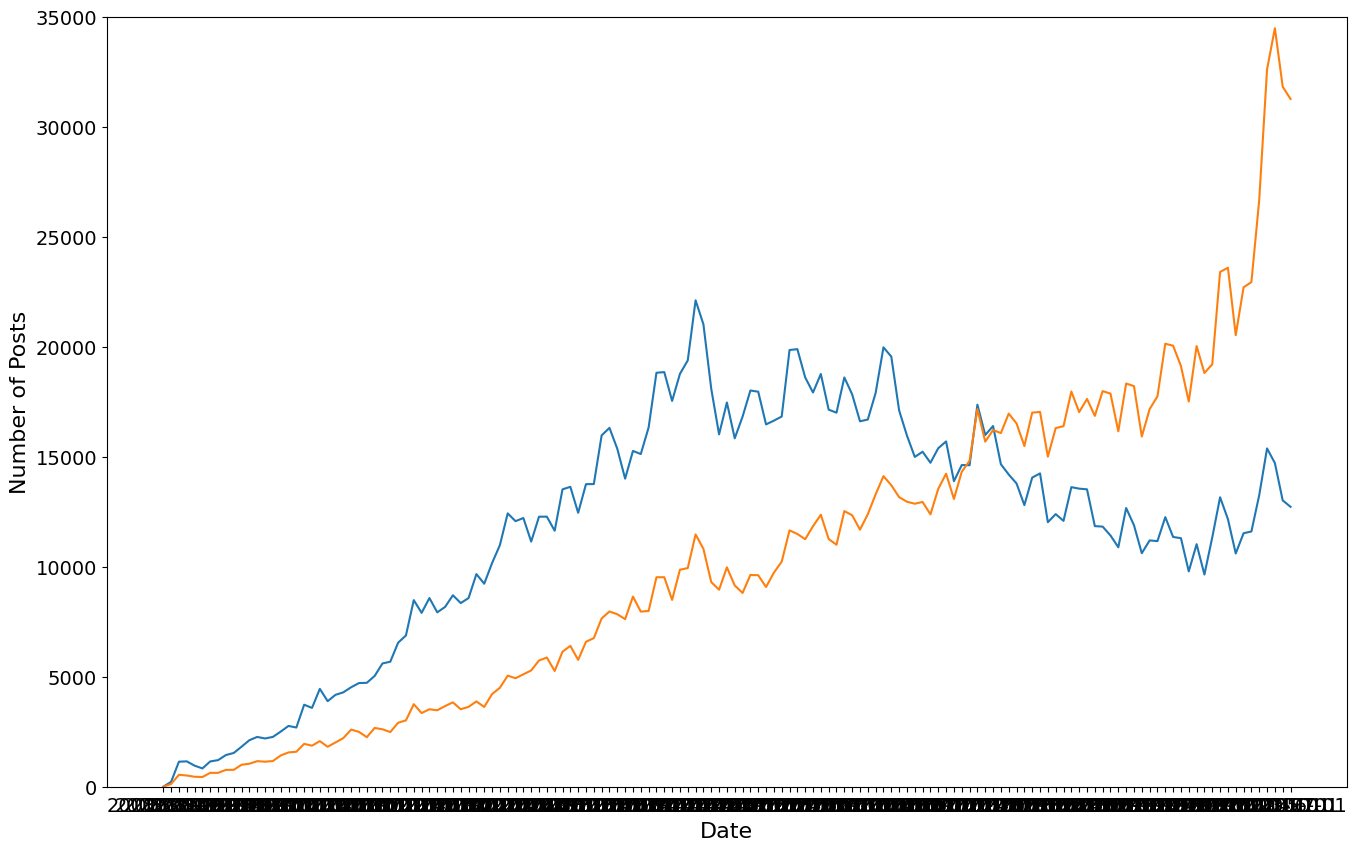

In [55]:
plt.figure(figsize=(16, 10))  # {width,height} in inches

# matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)
#   ticks: array-like - The list of xtick locations. Passing an empty list removes all xticks.
#   labels: array-like - The labels to place at the given ticks locations. This argument can only be passed if ticks is passed as well.
#   xticks **kwargs: Text properties can be used to control the appearance of the labels.
#     fontsize: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
#     If float, the fontsize in points. The string values denote sizes relative to the default font size.

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000) # Setting the Y-axis Limits

# plt.plot(reshaped_df.index, reshaped_df['java'])
# plt.plot(reshaped_df['java'])
# plt.plot(reshaped_df['python'])
plt.plot(reshaped_df[['java', 'python']])

In [63]:
import pandas as pd

# Convert 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

# Check the head of the reshaped DataFrame to ensure dates are in the correct format
print(reshaped_df.head())


TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   85.0   511.0  164.0    14.0 NaN   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0 NaN  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0 NaN  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0 NaN   958.0       579.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  161.0   124.0  NaN   73.0    NaN  
2008-09-01  131.0  482.0   542.0  6.0  290.0    NaN  
2008-10-01  127.0  617.0   510.0  NaN  249.0    NaN  
2008-11-01   97.0  504.0   452.0  1.0  160.0    NaN  


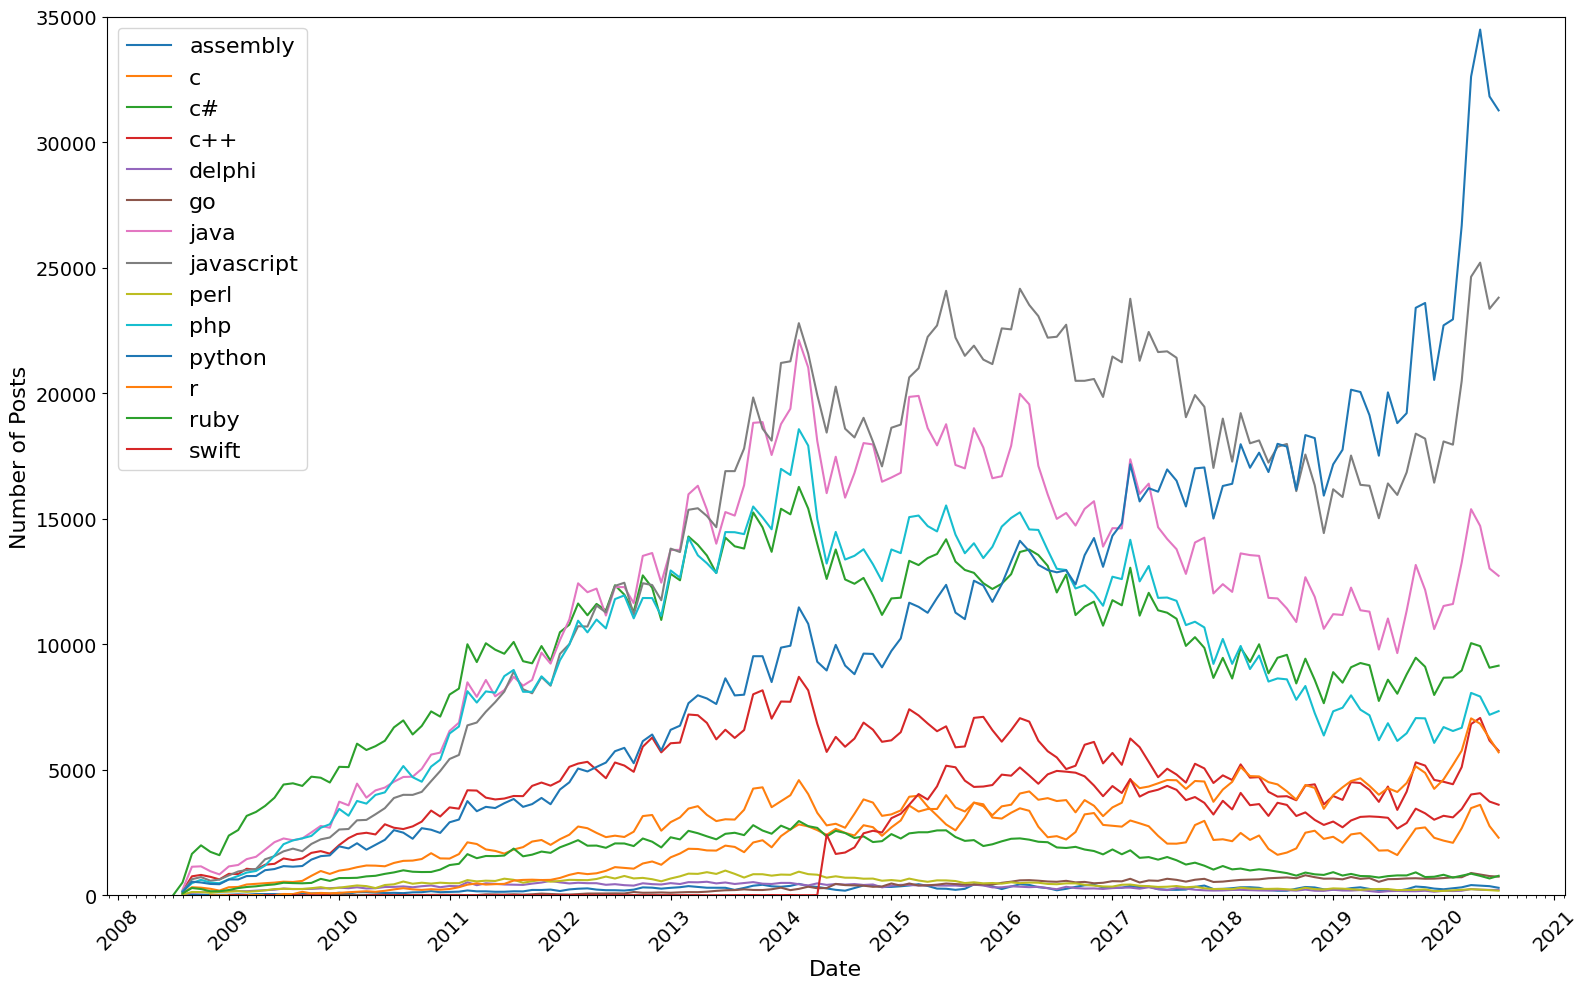

In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set the figure size to 16 inches wide and 10 inches tall
plt.figure(figsize=(16, 10))

# Set the font size for the x and y axis tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the labels for the x and y axes
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)

# Set the limit for the y-axis to range from 0 to 35,000
plt.ylim(0, 35000)

# Plot all columns in the reshaped_df DataFrame against the index (which is the date)
plt.plot(reshaped_df.index, reshaped_df)

# Add a legend with the column names of the DataFrame, setting the font size to 16
plt.legend(fontsize=16, labels=reshaped_df.columns)

# Set major ticks every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Format major ticks as Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set minor ticks every month
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Display the plot
plt.show()


In [65]:
# DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
# window: int, offset, or BaseIndexer subclass
#   int: Size of the moving window. This is the number of observations used for calculating the statistic.
#     Each window will be a fixed size.
# min_periods will default to the size of the window.


roll_df = reshaped_df.rolling(window=6)  # Rolling [window=6,center=False,axis=0]
roll_df

Rolling [window=6,center=False,axis=0,method=single]

In [66]:
roll_df = reshaped_df.rolling(window=6).mean()
roll_df
print(roll_df.head(10))  # Show the first 10 rows to see initial NaNs and rolling means
print(roll_df.tail(10))  # Show the last 10 rows to see the rolling means towards the end of the data


TAG          assembly           c           c#         c++      delphi  go  \
DATE                                                                         
2008-07-01        NaN         NaN          NaN         NaN         NaN NaN   
2008-08-01        NaN         NaN          NaN         NaN         NaN NaN   
2008-09-01        NaN         NaN          NaN         NaN         NaN NaN   
2008-10-01        NaN         NaN          NaN         NaN         NaN NaN   
2008-11-01        NaN         NaN          NaN         NaN         NaN NaN   
2008-12-01        NaN         NaN  1246.500000         NaN         NaN NaN   
2009-01-01  18.000000  245.833333  1642.333333  658.500000  111.666667 NaN   
2009-02-01  22.833333  287.000000  1990.333333  772.000000  137.333333 NaN   
2009-03-01  22.166667  305.166667  2242.500000  822.166667  146.833333 NaN   
2009-04-01  27.833333  331.000000  2464.333333  857.000000  159.000000 NaN   

TAG                java  javascript        perl         php    

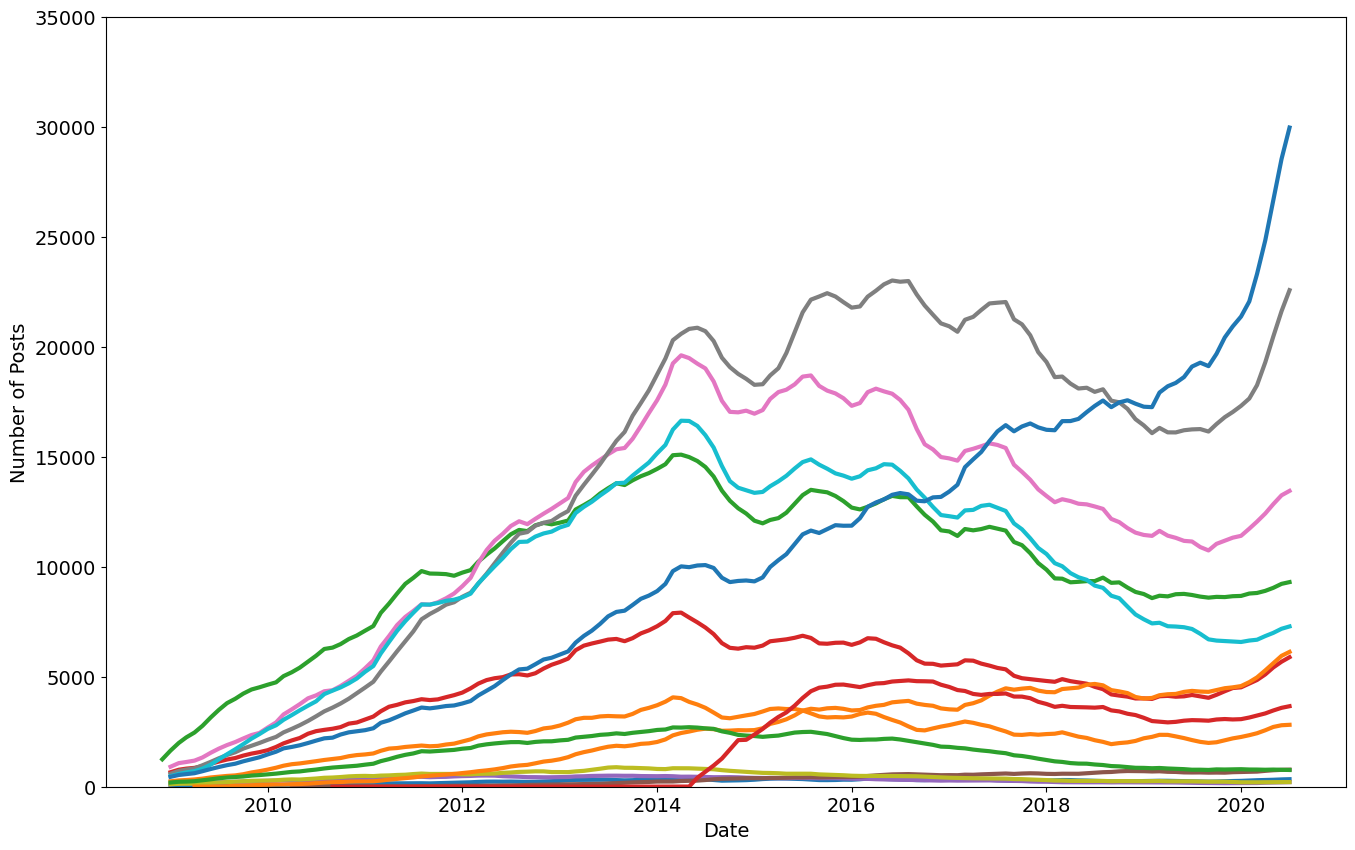

In [69]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

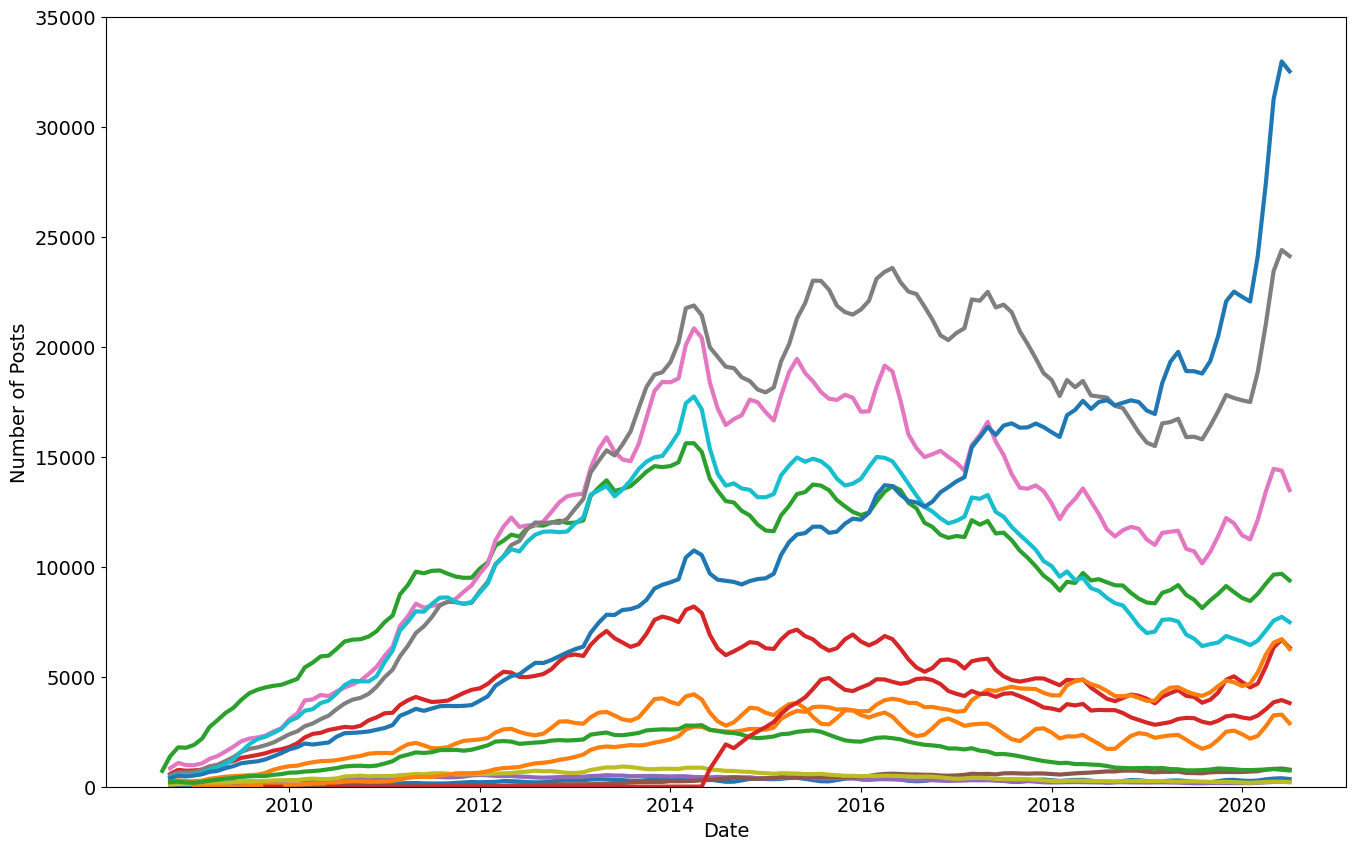

In [70]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

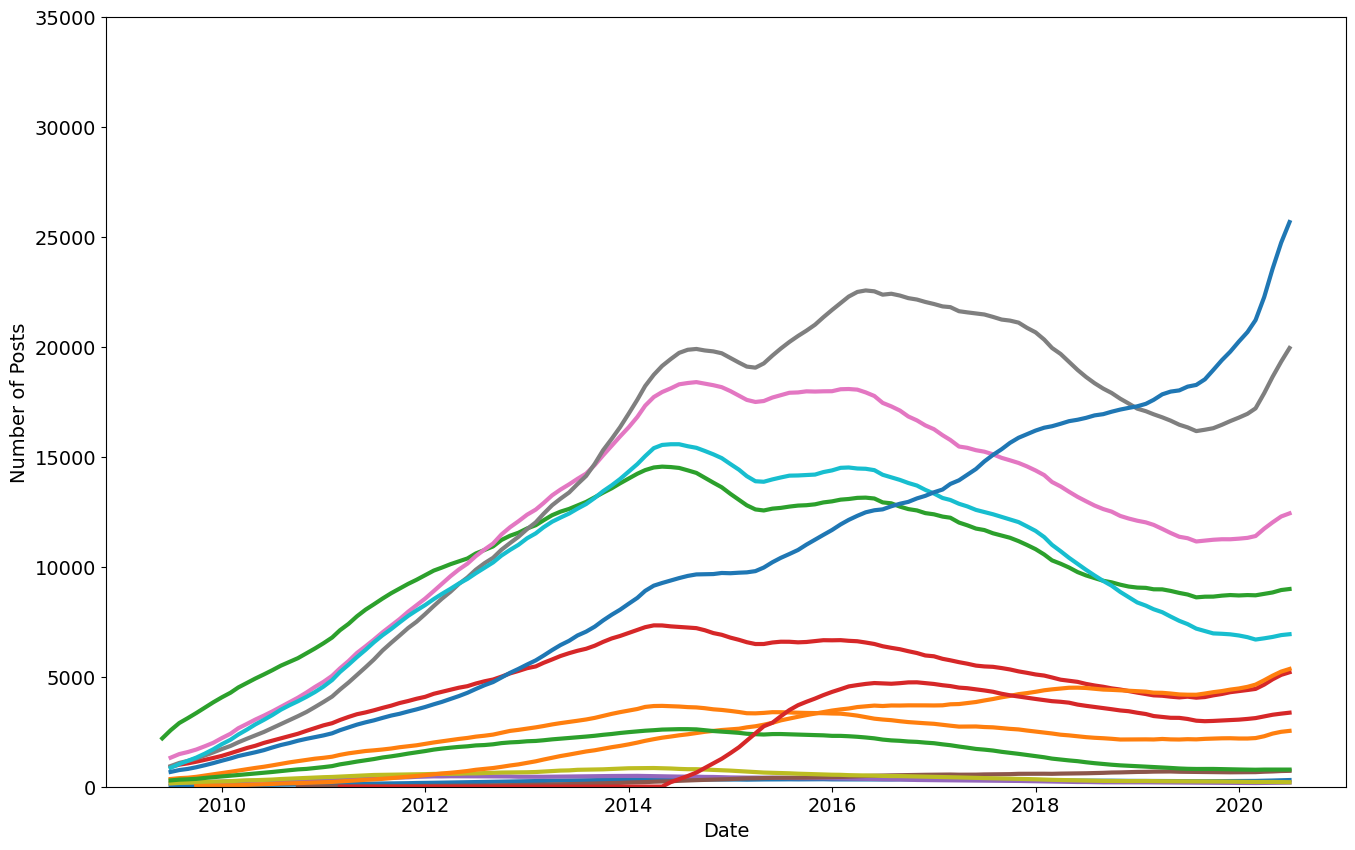

In [71]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

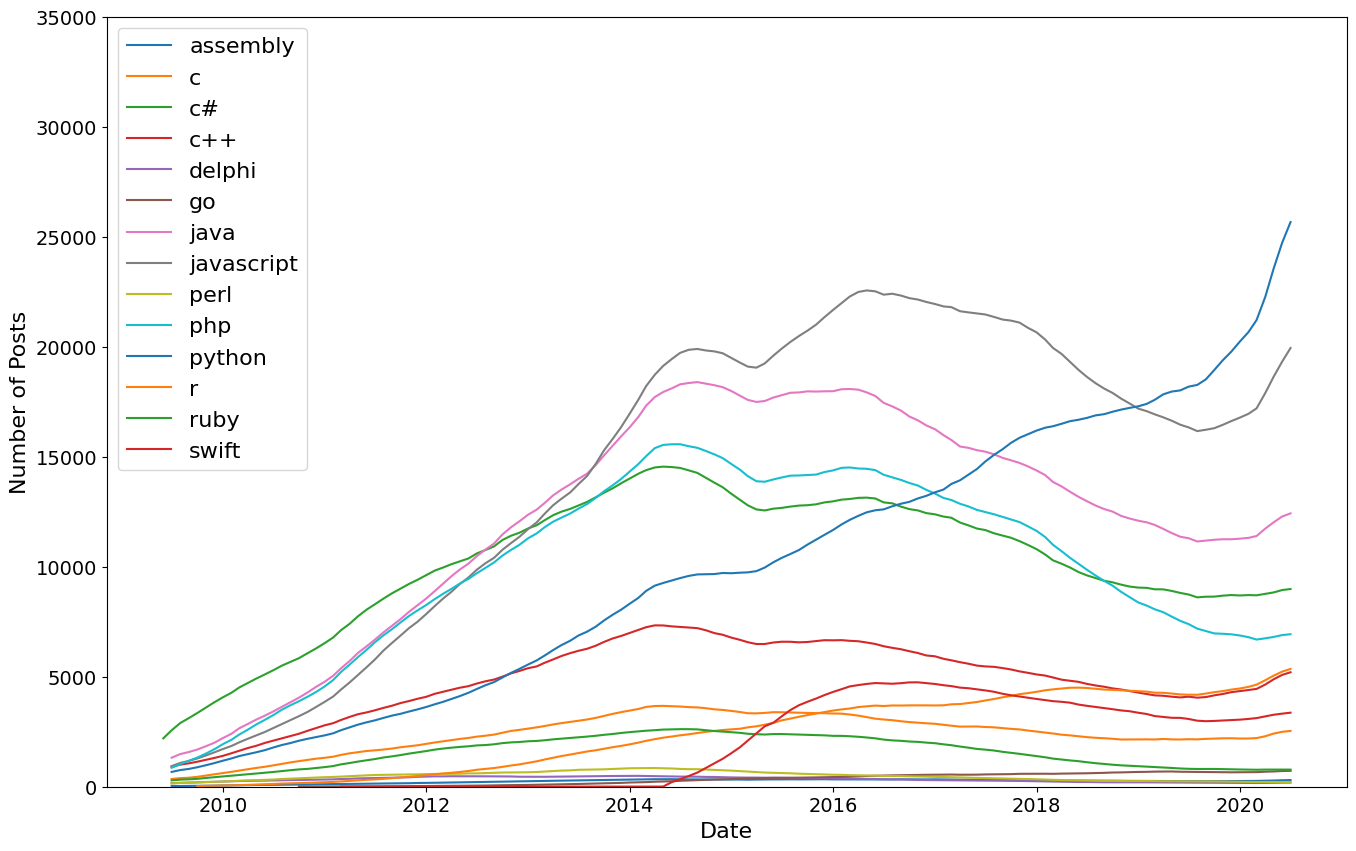

In [72]:
import matplotlib.pyplot as plt

# Set the size of the figure (width, height) in inches
plt.figure(figsize=(16, 10))

# Set the font size for the x-axis and y-axis ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label the x-axis and set the font size
plt.xlabel('Date', fontsize=16)

# Label the y-axis and set the font size
plt.ylabel('Number of Posts', fontsize=16)

# Set the y-axis limits to range from 0 to 35000
plt.ylim(0, 35000)

# Plot the rolling mean DataFrame with dates on the x-axis and the rolling means on the y-axis
# The rolling mean DataFrame has columns for different programming languages
plt.plot(roll_df.index, roll_df)

# Add a legend to the plot to identify each line with its corresponding programming language
# Set the font size of the legend text
plt.legend(fontsize=16, labels=roll_df.columns)

# Show the plot
plt.show()


In [73]:
# Set the option to display all rows in a DataFrame
pd.set_option('display.max_rows', None)

# Assuming reshaped_df is the DataFrame
print(reshaped_df)  # This will now display all rows of reshaped_df

TAG         assembly       c       c#     c++  delphi     go     java  \
DATE                                                                    
2008-07-01       NaN     NaN      3.0     NaN     NaN    NaN      NaN   
2008-08-01       8.0    85.0    511.0   164.0    14.0    NaN    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    NaN   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    NaN   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    NaN    958.0   
2008-12-01      18.0   186.0   1597.0   633.0   134.0    NaN    832.0   
2009-01-01      22.0   321.0   2378.0   853.0   164.0    NaN   1150.0   
2009-02-01      37.0   332.0   2599.0   845.0   168.0    NaN   1208.0   
2009-03-01      24.0   430.0   3162.0  1056.0   162.0    NaN   1440.0   
2009-04-01      49.0   458.0   3320.0  1020.0   185.0    NaN   1534.0   
2009-05-01      47.0   481.0   3560.0  1218.0   202.0    NaN   1819.0   
2009-06-01      49.0   505.0   3885.0  1253.0   222

In [74]:
slice_df = reshaped_df.loc[:'2012-12-01']
slice_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
2008-12-01,18.0,186.0,1597.0,633.0,134.0,NaN,832.0,627.0,134.0,481.0,441.0,1.0,161.0,NaN
2009-01-01,22.0,321.0,2378.0,853.0,164.0,NaN,1150.0,792.0,147.0,636.0,631.0,8.0,209.0,1.0
2009-02-01,37.0,332.0,2599.0,845.0,168.0,NaN,1208.0,948.0,165.0,769.0,630.0,9.0,287.0,1.0
2009-03-01,24.0,430.0,3162.0,1056.0,162.0,NaN,1440.0,1005.0,139.0,904.0,765.0,4.0,330.0,1.0


In [75]:
# List of programming languages to analyze

q1_list = ['Python', 'Javascript', 'Assembly', 'C#']

# Create a dictionary where the keys are programming languages and the values are the sum of posts for each language
# 'slice_df' should be your DataFrame with posts data
# q1_dict: Stores the total number of posts for each language in the q1_list.
# lang.lower(): Converts the language name to lowercase to match the column names in slice_df.
q1_dict = {lang: slice_df[lang.lower()].sum() for lang in q1_list}

# Display the dictionary with total posts for each language
print("Total posts per language:", q1_dict)

# Initialize variables to keep track of the most popular language and the number of posts
#  initializing two variables, lang and posts, with default values
lang, posts = "", 0

# Iterate over the dictionary items
for key, value in q1_dict.items(): # key: Represents the dictionary's key (in this case, a programming language name).
    # Check if the current language has more posts than the current maximum
    if value > posts:
        # Update the most popular language and the number of posts
        lang = key
        posts = value

# Print the result showing the most popular language and the number of posts
print(f'The most popular programming language from 2008 to 2012 is {lang} with {int(posts)} posts.')


Total posts per language: {'Python': 148417.0, 'Javascript': 291184.0, 'Assembly': 6899.0, 'C#': 380295.0}
The most popular programming language from 2008 to 2012 is C# with 380295 posts.


In [76]:
import pandas as pd

# Example DataFrame setup
# reshaped_df = pd.DataFrame(...)  # Your DataFrame should be set up here

# Ensure the index is a datetime index for time-based filtering
reshaped_df.index = pd.to_datetime(reshaped_df.index)

# Filter data for the years 2015 to 2018
start_date = '2015-01-01'
end_date = '2018-12-31'
filtered_df = reshaped_df.loc[start_date:end_date]

# Sum posts by language in the filtered period
language_totals = filtered_df.sum()

# Find the most popular language
most_popular_language = language_totals.idxmax()
most_popular_posts = language_totals.max()

print(f'The most popular programming language from 2015 to 2018 is {most_popular_language} with {int(most_popular_posts)} posts.')


The most popular programming language from 2015 to 2018 is javascript with 979868 posts.


In [77]:
# List of programming languages to check
q2_list = ['Python', 'Java', 'Javascript', 'PHP']

# Filter the DataFrame for the date range from January 1, 2015, to December 31, 2018
slice_df = reshaped_df.loc['2015-01-01':'2018-12-31']

# Create a dictionary to store the total number of posts for each language in the filtered DataFrame
q2_dict = {lang: slice_df[lang.lower()].sum() for lang in q2_list}

# Initialize variables to track the most popular language and the number of posts
lang, posts = "", 0

# Iterate over the dictionary items to find the language with the highest number of posts
for key, value in q2_dict.items():
    # Check if the current language has more posts than the previously recorded highest
    if value > posts:
        # Update the most popular language and the number of posts
        lang = key
        posts = value

# Print the result
print(f'The most popular programming language from 2015 to 2018 is {lang} with {int(posts)} posts.')


The most popular programming language from 2015 to 2018 is Javascript with 979868 posts.


In [78]:
# List of programming languages to check
languages_list = ['Python', 'Java', 'Javascript', 'PHP', 'C#', 'C++', 'Assembly', 'Go', 'Delphi', 'Ruby', 'R', 'Swift']

# Filter the DataFrame for the year 2020
slice_df_2020 = reshaped_df.loc['2020-01-01':'2020-12-31']

# Create a dictionary to store the total number of posts for each language in 2020
total_posts_2020 = {lang: slice_df_2020[lang.lower()].sum() for lang in languages_list}

# Initialize variables to track the most popular language and the number of posts
most_popular_lang, max_posts = "", 0

# Iterate over the dictionary items to find the language with the highest number of posts
for lang, posts in total_posts_2020.items():
    # Check if the current language has more posts than the previously recorded highest
    if posts > max_posts:
        # Update the most popular language and the number of posts
        most_popular_lang = lang
        max_posts = posts

# Print the result
print(f'The most popular programming language in 2020 is {most_popular_lang} with {int(max_posts)} posts.')


The most popular programming language in 2020 is Python with 202471 posts.


In [79]:
# List of all programming language columns from the reshaped DataFrame
q3_list = reshaped_df.columns

# Filter the DataFrame to include only data from January 1, 2020, to December 1, 2020
slice_df = reshaped_df.loc['2020-01-01':'2020-12-01']

# Create a dictionary to store the total number of posts for each programming language in 2020
# Iterate over each language column
q3_dict = {lang: slice_df[lang].sum() for lang in q3_list}

# Initialize variables to track the most popular language and the number of posts
lang, posts = "", 0

# Iterate over the dictionary items
for key, value in q3_dict.items():
    # Check if the current language has more posts than the previously recorded highest
    if value > posts:
        # Update the most popular language and the number of posts
        lang = key
        posts = value

# Print the result
print(f'The most popular programming language in 2020 is {lang} with {int(posts)} posts.')


The most popular programming language in 2020 is python with 202471 posts.
